# Main project 2

# Implement clustering algorithms to group similar data points together based on their features.

<b>Step 1: Load the Dataset.</b>

First, we need to load the dataset. We will assume that the dataset has been downloaded and is available as a CSV file

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline

In [2]:
data= pd.read_csv(r"C:\Users\santhosh\Downloads\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


<b>Step 2: Data Preprocessing</b>

In [3]:
# Check for Missing Values:

data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# Check for duplicates Values:
data.duplicated().sum()

0

In [7]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

<b>Step 3: Implement Clustering Algorithms with clustering quality and methods for determining the optimal number of clusters</b>

<b>1. KMeans Clustering</b>

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)


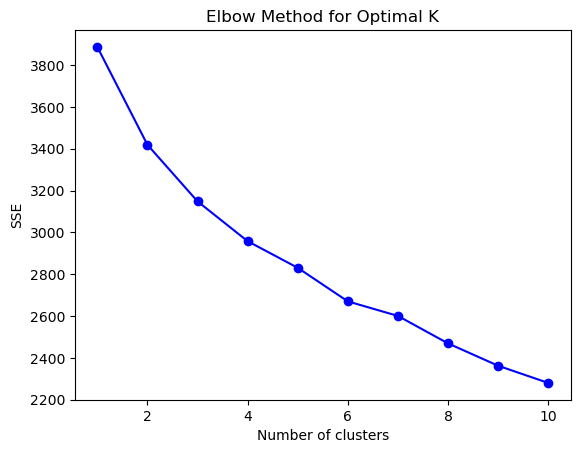

In [63]:
# Plot the elbow method
plt.plot(range(1, 11), sse, marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
# Choose the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

Evaluate clustering quality using metrics like silhouette score or Davies–Bouldin index.

In [12]:
# Evaluate clustering quality
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_db = davies_bouldin_score(scaled_df, kmeans_labels)
print(f'K-means Silhouette Score: {kmeans_silhouette:.2f}')
print(f'K-means Davies–Bouldin Index: {kmeans_db:.2f}')

K-means Silhouette Score: 0.10
K-means Davies–Bouldin Index: 2.33


<b>2. Hierarchical Clustering</b>

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical/agglomerative clustering
Z = linkage(scaled_df, method='ward')

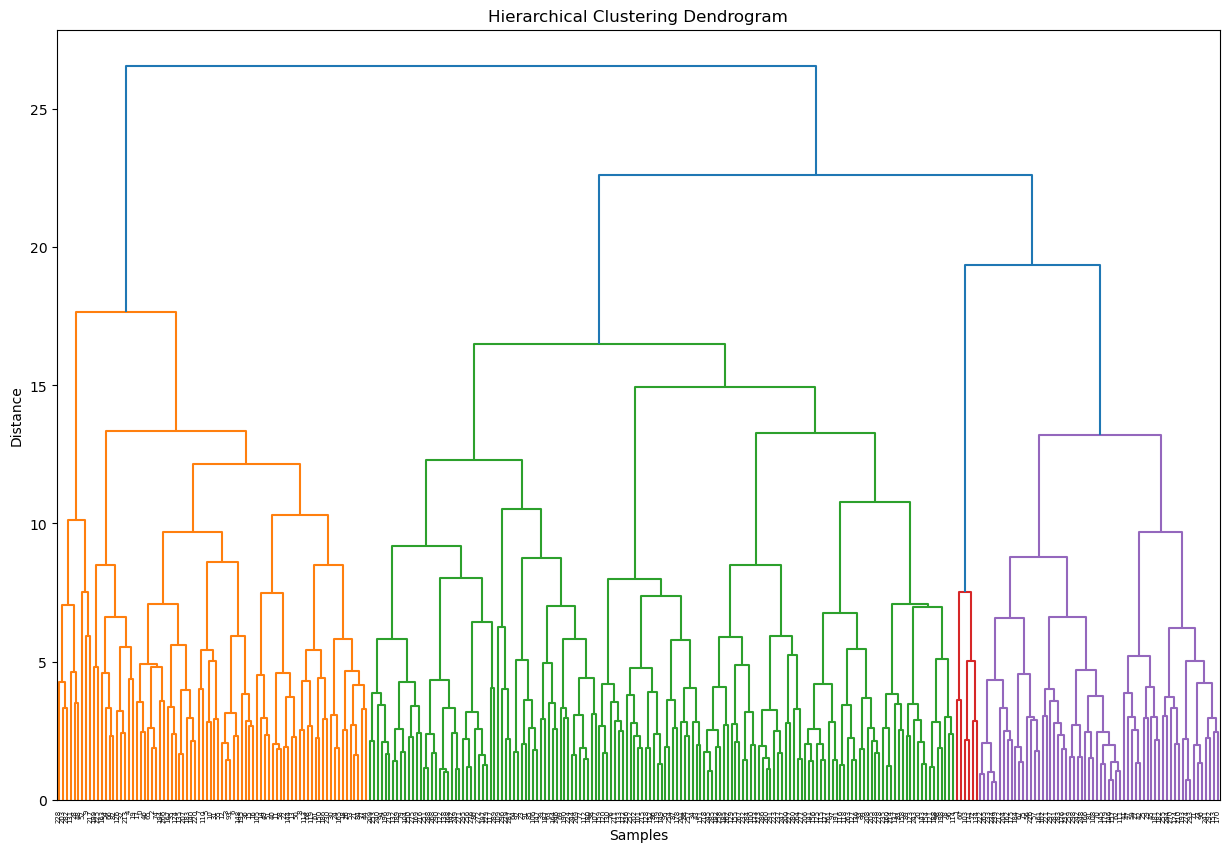

In [51]:
# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [16]:
# Choose the number of clusters based on the dendrogram (e.g., 3)
hier_labels = fcluster(Z, 3, criterion='maxclust')


In [17]:
# Evaluate clustering quality
hier_silhouette = silhouette_score(scaled_df, hier_labels)
hier_db = davies_bouldin_score(scaled_df, hier_labels)
print(f'Hierarchical Clustering Silhouette Score: {hier_silhouette:.2f}')
print(f'Hierarchical Clustering Davies–Bouldin Index: {hier_db:.2f}')

Hierarchical Clustering Silhouette Score: 0.09
Hierarchical Clustering Davies–Bouldin Index: 2.57


<b>3. DBSCAN Clustering</b>

1. Finding the Optimal eps using the k-distance graph
We can use the k-distance graph to help determine a suitable eps value. The idea is to plot the distance to the k-th nearest neighbor for each point and look for the "elbow" in the plot, which indicates a suitable eps.

In [61]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Determine the k-nearest neighbors
k = 10  # You can experiment with different values of k
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(scaled_df)
distances, indices = nearest_neighbors.kneighbors(scaled_df)

# Sort distances to the k-th nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]


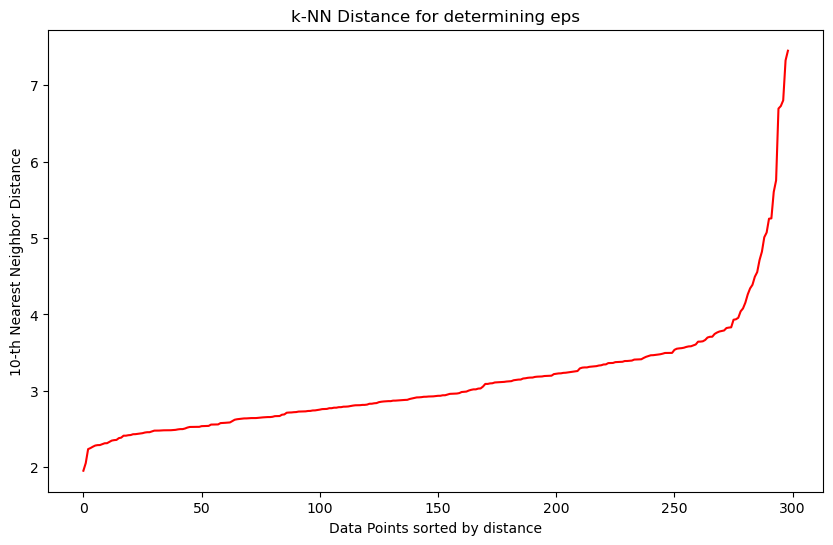

In [65]:
# Plot the distances
plt.figure(figsize=(10, 6))
plt.plot(distances, color='r')
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('k-NN Distance for determining eps')
plt.show()


2. Adjusting eps and min_samples for DBSCAN
Based on the k-distance graph, choose an appropriate eps value and experiment with different min_samples values.

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set eps based on the k-distance graph and adjust min_samples
eps_value = 2.5 # Update this value based on the k-distance graph
min_samples_value = 5  # You can experiment with different values

In [67]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(scaled_df)

In [68]:
# Evaluate clustering quality (ignoring noise points labeled as -1)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:
    dbscan_silhouette = silhouette_score(scaled_df[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    dbscan_db = davies_bouldin_score(scaled_df[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
    print(f'DBSCAN Davies–Bouldin Index: {dbscan_db:.2f}')
else:
    print('DBSCAN did not find enough clusters.')

DBSCAN Silhouette Score: 0.15
DBSCAN Davies–Bouldin Index: 1.27
